# Exploratory Data Analysis (EDA)
- Plot all
- Analyse numerical
- Analyse categorical
- Temporal analysis

In [1]:
import numpy as np
import pandas as pd

## Load data

In [2]:
plant = pd.read_csv('../Data/clean/plantanet_internet_gdp.csv', sep=',')
display(plant.shape)
display(plant.columns)
plant.head()

(150000, 18)

Index(['occurrenceid', 'class', 'order', 'family', 'genus', 'species',
       'scientificname', 'countrycode', 'decimallatitude', 'decimallongitude',
       'eventdate', 'day', 'month', 'year', 'country', 'incomeperperson',
       'internetuserate', 'urbanrate'],
      dtype='object')

,occurrenceid,class,order,family,genus,species,scientificname,countrycode,decimallatitude,decimallongitude,eventdate,day,month,year,country,incomeperperson,internetuserate,urbanrate
0,q-10050789731,Magnoliopsida,Lamiales,Plantaginaceae,Cymbalaria,Cymbalaria muralis,"Cymbalaria muralis P.Gaertn., B.Mey. & Scherb.",ES,39.737365,-0.828874,2016-05-28 11:32:01.482,28,5,2016,Spain,15461.75837,65.808554,77.12
1,q-10103707122,Magnoliopsida,Sapindales,Anacardiaceae,Pistacia,Pistacia lentiscus,Pistacia lentiscus L.,FR,43.068620,5.817762,2019-08-18 12:02:28.413,18,8,2019,France,22878.46657,77.498619,77.36
2,q-10593121245,Liliopsida,Asparagales,Orchidaceae,Anacamptis,Anacamptis pyramidalis,Anacamptis pyramidalis (L.) Rich.,FR,45.852500,-0.155000,2022-05-20 21:10:09.158,20,5,2022,France,22878.46657,77.498619,77.36
3,q-10067365606,Magnoliopsida,Boraginales,Boraginaceae,Cynoglossum,Cynoglossum creticum,Cynoglossum creticum Mill.,FR,43.151389,5.736667,2019-04-14 10:50:38.537,14,4,2019,France,22878.46657,77.498619,77.36
4,q-10536959012,Magnoliopsida,Lamiales,Orobanchaceae,Lathraea,Lathraea squamaria,Lathraea squamaria L.,DE,48.079440,7.587583,2022-03-14 14:36:23.989,14,3,2022,Germany,25306.18719,82.526898,73.64


In [3]:
plant.isnull().sum()/len(plant) # double-check that there are no missing values

occurrenceid        0.0
class               0.0
order               0.0
family              0.0
genus               0.0
species             0.0
scientificname      0.0
countrycode         0.0
decimallatitude     0.0
decimallongitude    0.0
eventdate           0.0
day                 0.0
month               0.0
year                0.0
country             0.0
incomeperperson     0.0
internetuserate     0.0
urbanrate           0.0
dtype: float64

## Split numerical-categorial

In [4]:
def var_types_split (df):
    numerical = df.select_dtypes(np.number)
    categorical = df.select_dtypes('object')
    return numerical, categorical

numerical_df, categorical_df = var_types_split(plant)

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Numerical

In [22]:
# check stats of numerical variables
numerical_df.describe().T

,count,mean,std,min,25%,50%,75%,max
decimallatitude,150000.0,45.433473,11.069672,-54.807064,43.666867,47.179853,50.259018,71.112304
decimallongitude,150000.0,-0.343254,30.954318,-176.178948,-0.071390,5.594533,10.274014,176.910963
day,150000.0,15.827900,8.788527,1.000000,8.000000,16.000000,23.000000,31.000000
month,150000.0,6.308207,2.181246,1.000000,5.000000,6.000000,8.000000,12.000000
year,150000.0,2020.582813,1.337024,2010.000000,2020.000000,2021.000000,2022.000000,2022.000000
incomeperperson,150000.0,22814.108497,8394.415042,0.000000,18982.269290,22878.466570,25575.352620,105147.437700
internetuserate,150000.0,73.477847,13.466492,0.000000,69.339971,77.498619,82.166660,95.638113
urbanrate,150000.0,75.606860,9.570910,0.000000,73.500000,77.360000,77.360000,100.000000


In [ ]:
# drop latitude and longitude 
#numerical_df = numerical_df.drop(['decimallatitude', 'decimallingitude'])

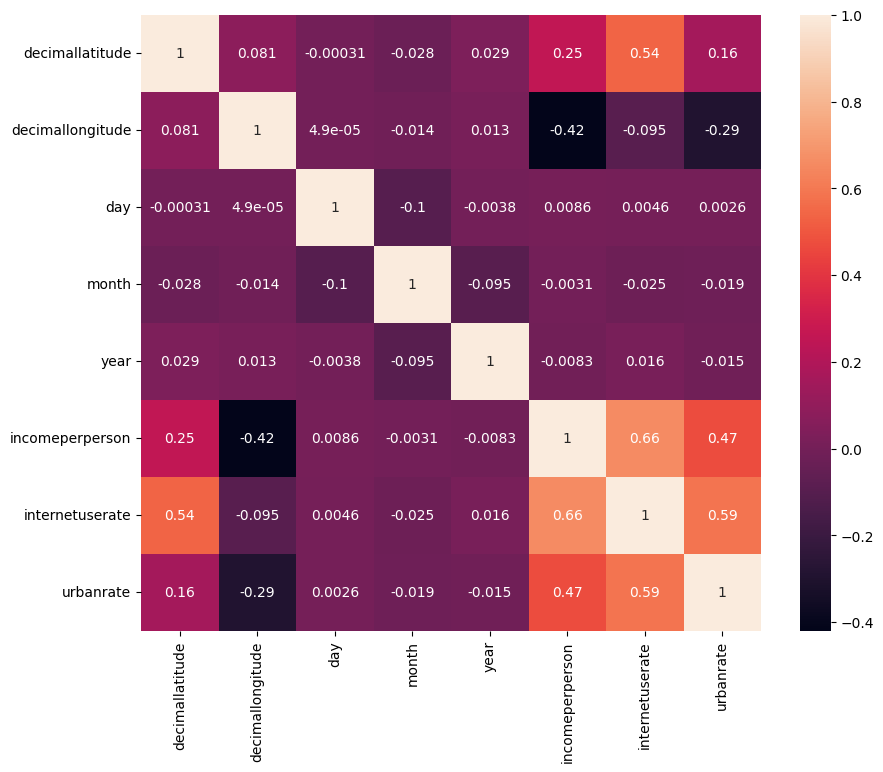

In [6]:
# Correlation matrix
corr_matrix=numerical_df.corr() # default: Pearson
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

Discrete-continuous

In [6]:
def numerical_split(df, cat=36):
    num_continuous_df = pd.DataFrame()
    num_discrete_df = pd.DataFrame()

    for col in df.columns:
        if df[col].nunique() > cat:
            num_continuous_df[col] = df[col]

        else:
            num_discrete_df[col] = df[col]

    return num_continuous_df, num_discrete_df

continuous_df, discrete_df = numerical_split(numerical_df)

### Plot

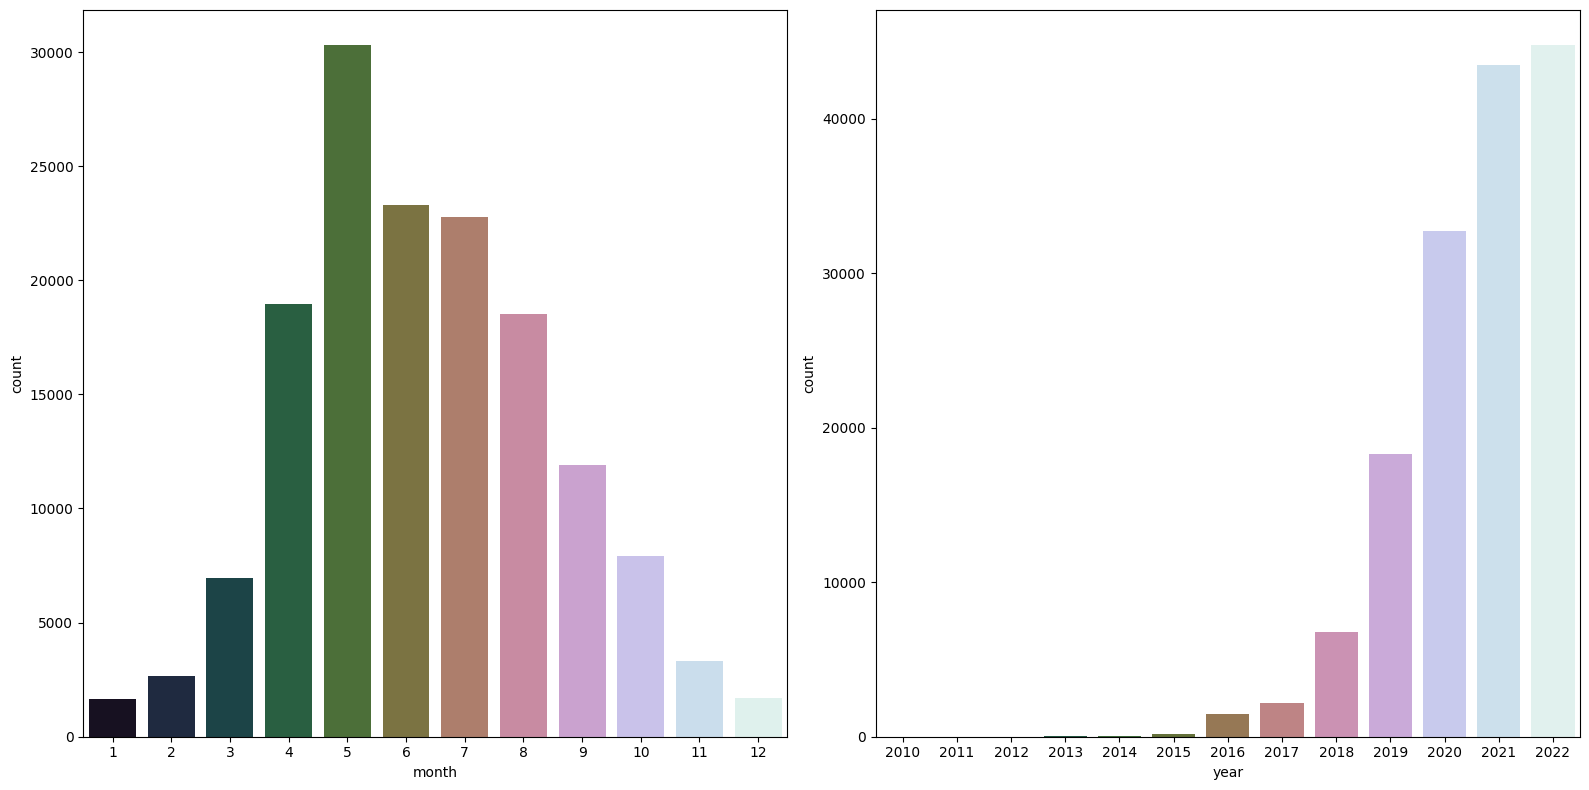

In [7]:
# countplot for descrete variables
def plot_discrete2(df):
    plt.figure(figsize=(16, 8))
    num_plots = len(df.columns)
    for i, col in enumerate(df.columns):
        plt.subplot((num_plots+1)//2, 2, i+1)
        sns.countplot(x=col, data=df, palette = "cubehelix")
    plt.tight_layout()
    plt.show()

plot_discrete2(discrete_df[['month', 'year']])    

### Import same dataset but with missing values
- The dataset used until now has zeros where there were missing values
- This affects the distribution and outliers of the variables ('incomeperperson', 'internetuserate', 'urbanrate')
- EDA (plots) the dataset WITH the missing values will be used

In [16]:
plant_nan = pd.read_csv('../Data/clean/plantanet_internet_gdp_nan.csv', sep=',')
display(plant_nan.shape)
display(plant_nan.columns)
display(plant_nan.head())
plant_nan.isnull().sum()/len(plant_nan)

(150000, 18)

Index(['occurrenceid', 'class', 'order', 'family', 'genus', 'species',
       'scientificname', 'countrycode', 'decimallatitude', 'decimallongitude',
       'eventdate', 'day', 'month', 'year', 'country', 'incomeperperson',
       'internetuserate', 'urbanrate'],
      dtype='object')

occurrenceid        0.000000
class               0.000000
order               0.000000
family              0.000000
genus               0.000000
species             0.000000
scientificname      0.000000
countrycode         0.000000
decimallatitude     0.000000
decimallongitude    0.000000
eventdate           0.000000
day                 0.000000
month               0.000000
year                0.000000
country             0.000000
incomeperperson     0.004453
internetuserate     0.004340
urbanrate           0.004020
dtype: float64

In [17]:
numerical_nan_df, categorical_nan_df = var_types_split(plant_nan)
continuous_nan_df, discrete_nan_df = numerical_split(numerical_nan_df)

In [23]:
# check stats of numerical variables
numerical_nan_df.describe().T

,count,mean,std,min,25%,50%,75%,max
decimallatitude,150000.0,45.433473,11.069672,-54.807064,43.666867,47.179853,50.259018,71.112304
decimallongitude,150000.0,-0.343254,30.954318,-176.178948,-0.071390,5.594533,10.274014,176.910963
day,150000.0,15.827900,8.788527,1.000000,8.000000,16.000000,23.000000,31.000000
month,150000.0,6.308207,2.181246,1.000000,5.000000,6.000000,8.000000,12.000000
year,150000.0,2020.582813,1.337024,2010.000000,2020.000000,2021.000000,2022.000000,2022.000000
incomeperperson,149332.0,22916.161804,8273.012359,103.775857,18982.269290,22878.466570,26551.844240,105147.437700
internetuserate,149349.0,73.798130,12.589694,0.720009,69.770394,77.498619,82.166660,95.638113
urbanrate,149397.0,75.912027,8.294944,12.980000,73.500000,77.360000,77.360000,100.000000


In [24]:
# check the min values of the numerical continuous variables
print(continuous_nan_df.min())
# there are no zero values as we already saw in the previous table

decimallatitude     -54.807064
decimallongitude   -176.178948
incomeperperson     103.775857
internetuserate       0.720009
urbanrate            12.980000
dtype: float64


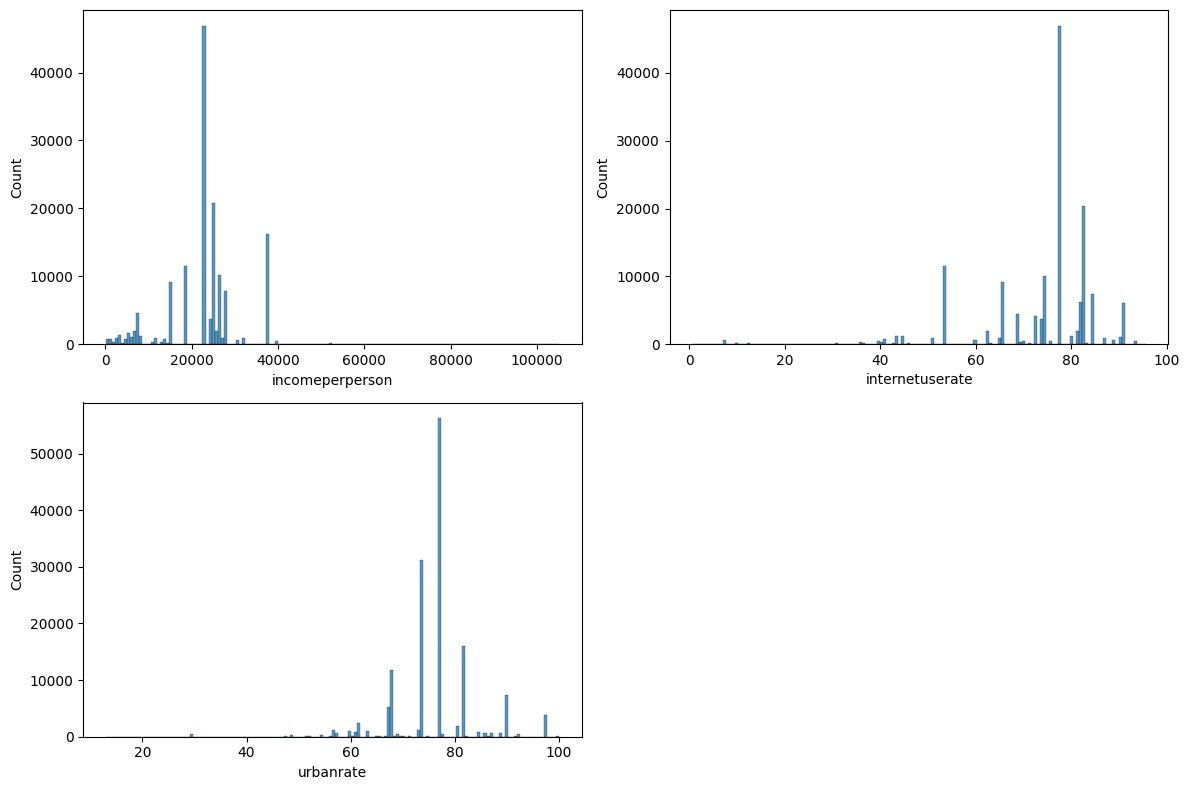

In [18]:
# histograms for continuous variables
def plot_continuous(df):
    plt.figure(figsize=(12, 8))
    num_plots = len(df.columns)
    for i, col in enumerate(df.columns):
        plt.subplot((num_plots+1)//2, 2, i+1)
        sns.histplot(x=col, data=df, bins=150)
    plt.tight_layout()
    plt.show()

plot_continuous(continuous_nan_df[['incomeperperson', 'internetuserate', 'urbanrate']])    

### Outliers in numerical continuous variables

In [21]:
#continuous_df.loc[continuous_df['urbanrate'] > 0]

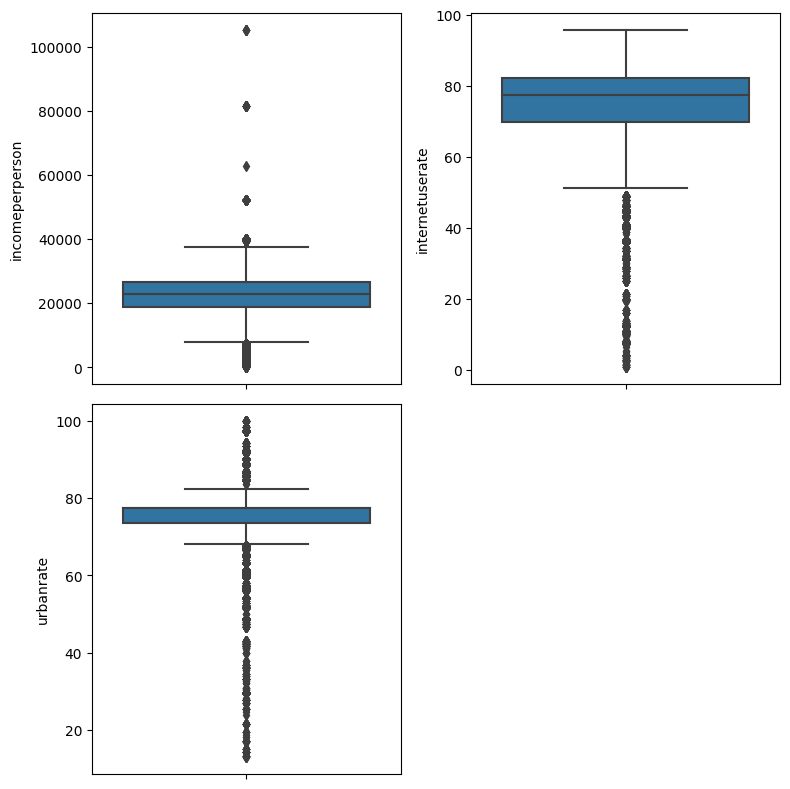

In [19]:
def boxplot_continuous(df):
    plt.figure(figsize=(8, 8))
    num_plots = len(df.columns)
    for i, col in enumerate(df.columns):
        plt.subplot((num_plots+1)//2, 2, i+1)
        sns.boxplot(y=col, data=df)
    plt.tight_layout()
    plt.show()

boxplot_continuous(continuous_nan_df[['incomeperperson', 'internetuserate', 'urbanrate']])    

#### Income
Economies are divided according to 2010 per capita GNI, calculated using the World Bank Atlas Method. The groups are: 
- low-income, USD 1,005 or less
- lower-middle income: USD 1,006 - USD 3,975
- upper-middle income: USD 3,976 - USD 12,275
- high-income, USD 12,276 or more

See [online](http://data.worldbank.org/about/country-classifications)

Based on this information, it might be interesting to create some bins.

#### Internet user rate
internetuserate: Internet users (per 100 people). Internet users are people with access to the worldwide network.
- Classify the users rate based on the information in the histogram

In [66]:
bin_labels5 = ['very low', 'low', 'middle', 'high', 'very high']
continuous_nan_df['internetuserate_groups'] = pd.cut(continuous_nan_df['internetuserate'],
                                                    [0, 40, 60, 75, 85, 100], labels=bin_labels5,
                                                    precision=0)
continuous_nan_df.head(15)

,decimallatitude,decimallongitude,incomeperperson,internetuserate,urbanrate,internetuserate_groups
0,39.737365,-0.828874,15461.758370,65.808554,77.12,middle
1,43.068620,5.817762,22878.466570,77.498619,77.36,high
2,45.852500,-0.155000,22878.466570,77.498619,77.36,high
3,43.151389,5.736667,22878.466570,77.498619,77.36,high
4,48.079440,7.587583,25306.187190,82.526898,73.64,high
5,55.423056,36.800000,2923.144355,43.366498,72.84,low
6,39.421987,-76.540568,37491.179520,74.247572,81.70,middle
7,51.117365,-3.002164,28033.489280,84.731705,89.94,high
8,39.955327,15.735931,18982.269290,53.740217,68.08,low
9,43.605465,6.577390,22878.466570,77.498619,77.36,high


In [60]:
continuous_nan_df['internetuserate_groups'].value_counts()

internetuserate_groups
high         84580
middle       36261
low          16627
very high     9093
very low      2788
Name: count, dtype: int64

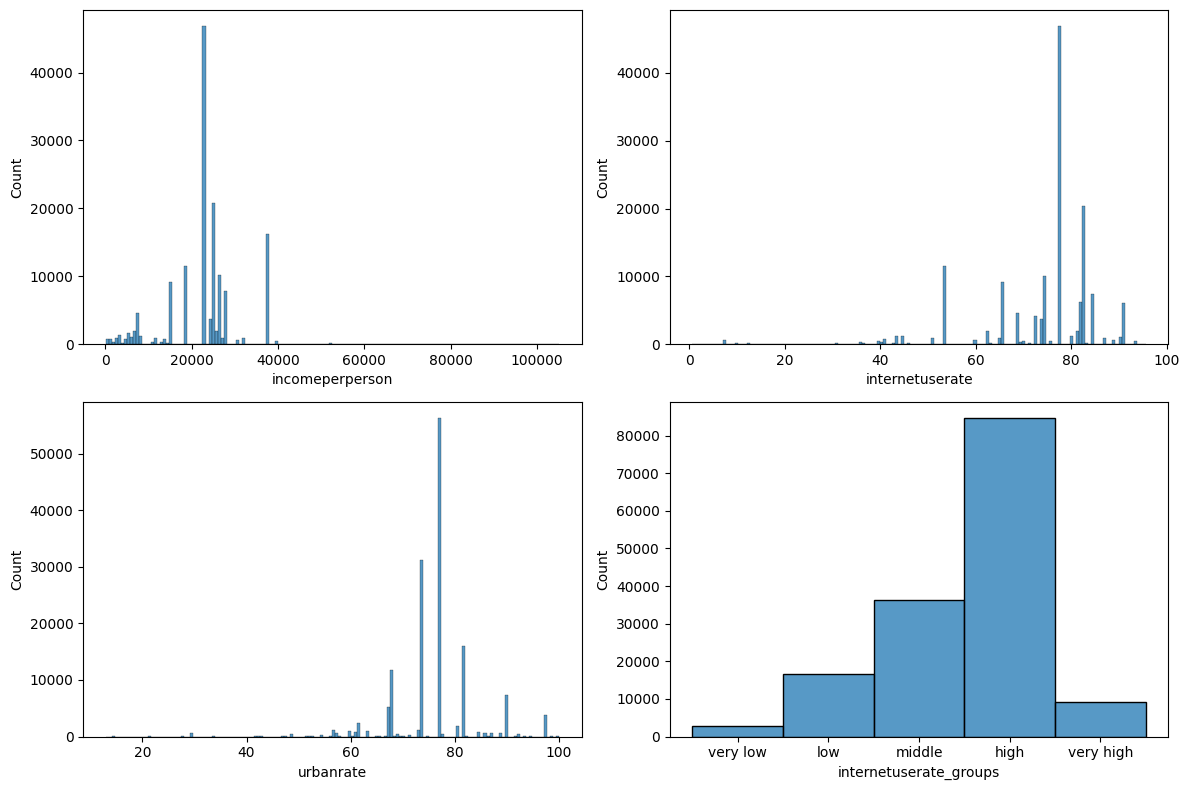

In [61]:
plot_continuous(continuous_nan_df[['incomeperperson', 'internetuserate', 'urbanrate', 'internetuserate_groups']])    

## Categorical

In [25]:
categorical_df.columns

Index(['occurrenceid', 'class', 'order', 'family', 'genus', 'species',
       'scientificname', 'countrycode', 'eventdate', 'country'],
      dtype='object')

In [26]:
print(categorical_df['countrycode'].unique())


['ES' 'FR' 'DE' 'RU' 'US' 'GB' 'IT' 'AT' 'NL' 'LU' 'AU' 'GR' 'PL' 'CZ'
 'CH' 'BE' 'ME' 'PE' 'BR' 'HU' 'LT' 'DK' 'TR' 'SE' 'RS' 'GP' 'SI' 'UA'
 'MA' 'IE' 'FI' 'CA' 'PT' 'IL' 'SK' 'LV' 'MX' 'SG' 'BO' 'IM' 'IN' 'RO'
 'BG' 'UY' 'HR' 'PH' 'ID' 'TW' 'NC' 'TH' 'PK' 'DZ' 'AR' 'RE' 'CR' 'NP'
 'KG' 'NO' 'EE' 'CO' 'JP' 'NZ' 'VN' 'MQ' 'BL' 'IR' 'SM' 'JE' 'GE' 'BY'
 'CL' 'SN' 'CY' 'TM' 'RW' 'AD' 'MT' 'GG' 'BM' 'VE' 'CN' 'CM' 'MD' 'IS'
 'UG' 'MZ' 'BD' 'ZA' 'GT' 'KM' 'DO' 'GD' 'TT' 'PR' 'VU' 'PY' 'BA' 'SV'
 'AL' 'EC' 'LI' 'unknown' 'IQ' 'NG' 'SA' 'SC' 'GI' 'TZ' 'HT' 'AX' 'BT'
 'GF' 'ZM' 'AZ' 'AM' 'EG' 'PF' 'UZ' 'ML' 'CU' 'KR' 'KE' 'XK' 'LC' 'MK'
 'VI' 'CW' 'HN' 'HK' 'MV' 'GA' 'MU' 'SY' 'MY' 'CD' 'LK' 'TN' 'KZ' 'LR'
 'LY' 'PA' 'MC' 'MF' 'BF' 'AE' 'JO' 'BB' 'TG' 'LB' 'BJ' 'CI' 'LA' 'SR'
 'NI' 'JM' 'PS' 'WF' 'BH' 'PM' 'OM' 'YE' 'DM' 'CV' 'MM' 'MW' 'BS' 'AO'
 'GN' 'FO' 'ET' 'GY' 'MR' 'BZ' 'GH' 'SL' 'MG' 'TD' 'AG' 'CK' 'MN' 'VG'
 'KH' 'DJ' 'AF' 'BQ' 'YT' 'KW']


### Plots

In [27]:
categorical_df['country'].value_counts()

country
France               46864
Germany              20306
Italy                11480
United States         9943
Spain                 9137
                     ...  
Yemen                    1
Liberia                  1
Bahrain                  1
Wallis and Futuna        1
Kuwait                   1
Name: count, Length: 186, dtype: int64

In [28]:
# group countries by region
africa = ['DZ', 'AO', 'BJ', 'BW', 'BF', 'BI', 'CM', 'CV', 'CF', 'TD', 'KM', 'CG', 'CD', 'CI', 'DJ', 'EG', 'GQ', 'ER', 'ET', 'GA', 'GM', 'GH', 'GN', 'GW', 'KE', 'LS', 'LR', 'LY', 'MG', 'MW', 'ML', 'MR', 'MU', 'YT', 'MA', 'MZ', 'NA', 'NE', 'NG', 'RE', 'RW', 'ST', 'SN', 'SC', 'SL', 'SO', 'ZA', 'SS', 'SD', 'SZ', 'TZ', 'TG', 'TN', 'UG', 'EH', 'ZM', 'ZW']
asia = ['AF', 'AM', 'AZ', 'BH', 'BD', 'BT', 'BN', 'KH', 'CN', 'CY', 'GE', 'IN', 'ID', 'IR', 'IQ', 'IL', 'JP', 'JO', 'KZ', 'KW', 'KG', 'LA', 'LB', 'MY', 'MV', 'MN', 'MM', 'NP', 'KP', 'OM', 'PK', 'PS', 'PH', 'QA', 'SA', 'SG', 'KR', 'LK', 'SY', 'TW', 'TJ', 'TH', 'TL', 'TR', 'TM', 'AE', 'UZ', 'VN', 'YE']
europe = ['AL', 'AD', 'AT', 'BY', 'BE', 'BA', 'BG', 'HR', 'CY', 'CZ', 'DK', 'EE', 'FO', 'FI', 'FR', 'DE', 'GI', 'GR', 'HU', 'IS', 'IE', 'IM', 'IT', 'XK', 'LV', 'LI', 'LT', 'LU', 'MK', 'MT', 'MD', 'MC', 'ME', 'NL', 'NO', 'PL', 'PT', 'RO', 'RU', 'SM', 'RS', 'SK', 'SI', 'ES', 'SE', 'CH', 'UA', 'GB', 'VA']
north_america = ['AG', 'BS', 'BB', 'BZ', 'CA', 'CR', 'CU', 'CW', 'DM', 'DO', 'SV', 'GL', 'GD', 'GT', 'HT', 'HN', 'JM', 'MX', 'MS', 'NI', 'PA', 'PR', 'KN', 'LC', 'VC', 'SX', 'TT', 'TC', 'US', 'VG', 'VI']
south_america = ['AR', 'BO', 'BR', 'CL', 'CO', 'EC', 'FK', 'GF', 'GY', 'PY', 'PE', 'SR', 'UY', 'VE']
oceania = ['AS', 'AU', 'CK', 'FJ', 'PF', 'GU', 'KI', 'MH', 'FM', 'NR', 'NC', 'NZ', 'NU', 'MP', 'PW', 'PG', 'PN', 'WS', 'SB', 'TK', 'TO', 'TV', 'UM', 'VU', 'WF']

def get_region(countrycode):
    if countrycode in africa:
        return 'Africa'
    elif countrycode in asia:
        return 'Asia'
    elif countrycode in europe:
        return 'Europe'
    elif countrycode in north_america:
        return 'North America'
    elif countrycode in south_america:
        return 'South America'
    elif countrycode in oceania:
        return 'Oceania'
    else:
        return 'unknown'


In [29]:
categorical_df['region'] = categorical_df['countrycode'].apply(get_region)

In [30]:
categorical_df.head()

,occurrenceid,class,order,family,genus,species,scientificname,countrycode,eventdate,country,region
0,q-10050789731,Magnoliopsida,Lamiales,Plantaginaceae,Cymbalaria,Cymbalaria muralis,"Cymbalaria muralis P.Gaertn., B.Mey. & Scherb.",ES,2016-05-28 11:32:01.482,Spain,Europe
1,q-10103707122,Magnoliopsida,Sapindales,Anacardiaceae,Pistacia,Pistacia lentiscus,Pistacia lentiscus L.,FR,2019-08-18 12:02:28.413,France,Europe
2,q-10593121245,Liliopsida,Asparagales,Orchidaceae,Anacamptis,Anacamptis pyramidalis,Anacamptis pyramidalis (L.) Rich.,FR,2022-05-20 21:10:09.158,France,Europe
3,q-10067365606,Magnoliopsida,Boraginales,Boraginaceae,Cynoglossum,Cynoglossum creticum,Cynoglossum creticum Mill.,FR,2019-04-14 10:50:38.537,France,Europe
4,q-10536959012,Magnoliopsida,Lamiales,Orobanchaceae,Lathraea,Lathraea squamaria,Lathraea squamaria L.,DE,2022-03-14 14:36:23.989,Germany,Europe


In [31]:
categorical_df['region'].value_counts(dropna=False)

region
Europe           132966
North America     12279
Asia               1718
South America      1455
Africa              710
Oceania             609
unknown             263
Name: count, dtype: int64

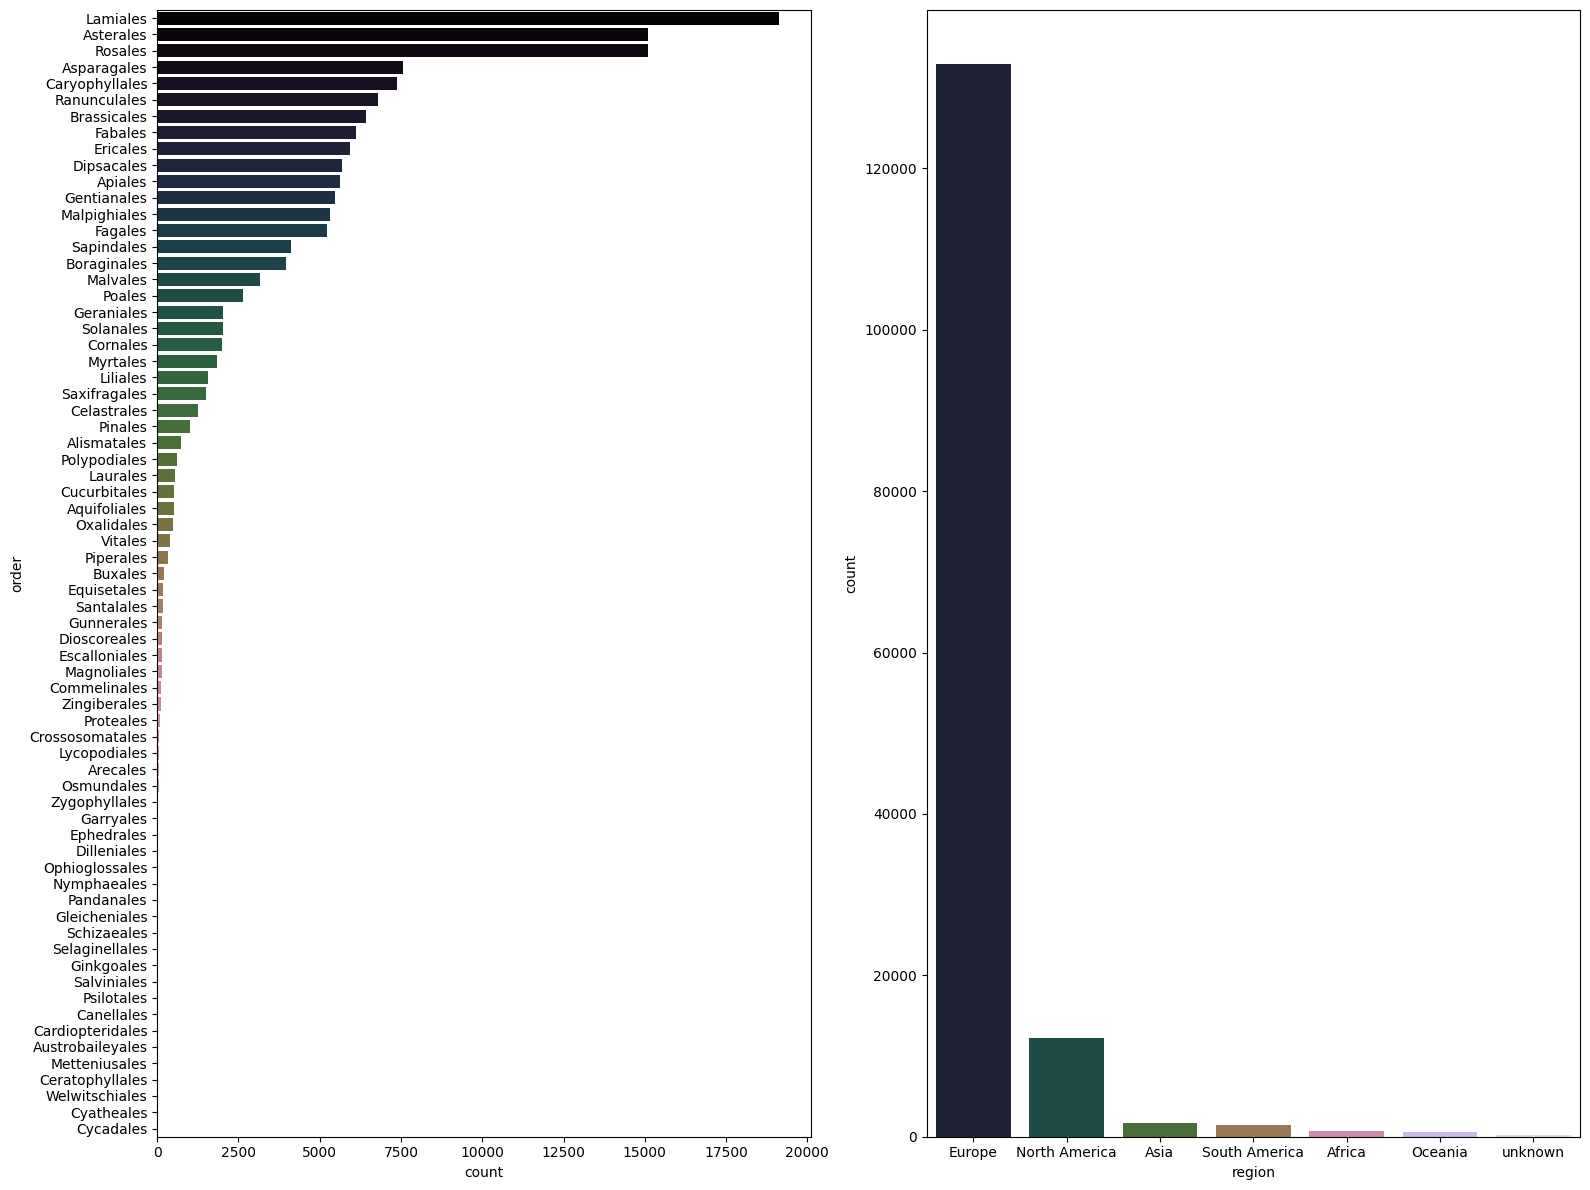

In [32]:
def plot_categorical(df, cat=8):
    plt.figure(figsize=(16, 12))
    num_plots = len(df.columns)
    for i, col in enumerate(df.columns):
        plt.subplot((num_plots+1)//2, 2, i+1)
        if df[col].nunique() < cat:
            sns.countplot(x=col, data=df, order=list(df[col].value_counts().index), palette="cubehelix")
        else:
            sns.countplot(y=col, data=df, order=list(df[col].value_counts().index), palette="cubehelix")   
    plt.tight_layout()
    plt.show()

plot_categorical(categorical_df[['order', 'region']])    

## Temporal analysis

In [ ]:
plt.figure(figsize=(20, 10))
sns.lineplot(x= 'effective_to_date', y='total_claim_amount', data=plant, ci=None)

plt.xticks(rotation=20)
plt.show()